# Avoiding Overfitting: Optimal Training for Convex Shallow Neural Netowrks

Ethan Harvey

In [54]:
%run -i shallow_neural_networks.py

# import libraries as needed
import numpy as np
np.random.seed(0)
import pandas as pd
import math

from sklearn.datasets import make_regression
from sklearn.preprocessing import PolynomialFeatures

from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [79]:
X, y = make_regression(n_samples=30, n_features=1, noise=40, random_state=0)
# make all y's positive
y = (y+abs(min(y)))/(max(y)+abs(min(y)))
train_test_mask = np.random.choice([0, 1], size=(y.shape[0]), p=[0.3, 0.7])
X_train = X[train_test_mask==1]
y_train = y[train_test_mask==1]
X_test = X[train_test_mask==0]
y_test = y[train_test_mask==0]
print("X_train shape: {}".format(X_train.shape))
print(" X_test shape: {}".format(X_test.shape))

X_train shape: (25, 1)
 X_test shape: (5, 1)


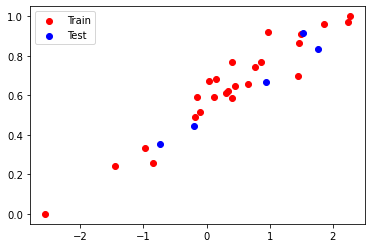

In [80]:
plt.scatter(X_train, y_train, color="red", label="Train")
plt.scatter(X_test, y_test, color="blue", label="Test")
plt.legend()
plt.show()

In [81]:
def gradient_descent(A, y, epsilon=1e-5, maxiter=100):
    n, m = A.shape
    x = np.zeros(m)
    iternum = 0
    for i in range(maxiter):
        dx = -single_neuron_grad(A, y, x)
        x = x + 0.01*dx
    return x

In [82]:
polynomial_transform = PolynomialFeatures(degree=1, include_bias=True)
X_train_transform = polynomial_transform.fit_transform(X_train)
X_test_transform = polynomial_transform.fit_transform(X_test)

train_costs, test_costs, thetas = [], [], []

for idx in range(100):
    theta = gradient_descent(X_train_transform, y_train, maxiter=idx)
    # append cost
    train_cost = single_neuron_cost(X_train_transform, y_train, theta)
    test_cost = single_neuron_cost(X_test_transform, y_test, theta)
    train_costs.append(train_cost)
    test_costs.append(test_cost)
    # append theta
    thetas.append(theta)

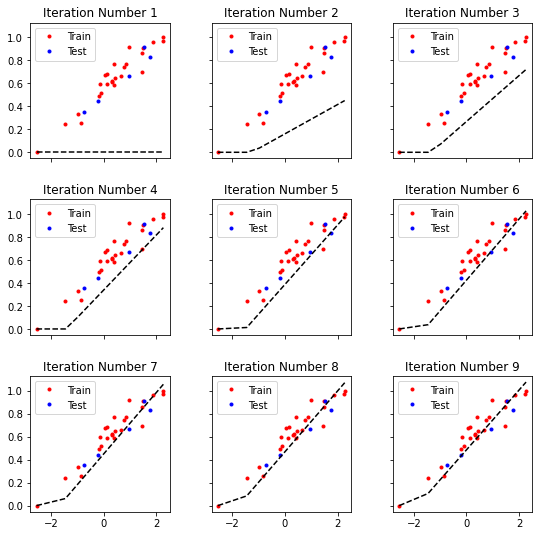

In [83]:
figure, axs = plt.subplots(3, 3, figsize=(9,9), sharex=True, sharey=True)
plt.subplots_adjust(wspace=0.3, hspace=0.3)
for idx, theta in enumerate(thetas[0:9]):
    X_transform = polynomial_transform.fit_transform(X)
    predictions = relu(X_transform@theta)
    data_frame = pd.DataFrame(data=[X[:, 0], predictions]).T
    data_frame = data_frame.sort_values(by=0)
    x_sorted = data_frame.iloc[:, :-1].values
    prediction_sorted = data_frame.iloc[:, 1].values
    axs[int(idx/3)][idx%3].plot(X_train, y_train, 'r.', label="Train")
    axs[int(idx/3)][idx%3].plot(X_test, y_test, 'b.', label="Test")
    axs[int(idx/3)][idx%3].plot(x_sorted, prediction_sorted, 'k--')
    axs[int(idx/3)][idx%3].set_title("Iteration Number {}".format(idx+1))
    axs[int(idx/3)][idx%3].legend()
figure.show()

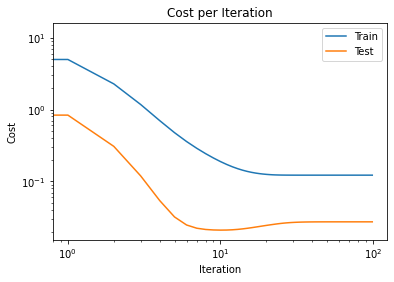

In [84]:
plt.plot([i for i in range(100)], train_costs, label="Train")
plt.plot([i for i in range(100)], test_costs, label="Test")
#plt.xlabel("\u03B5")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.title("Cost per Iteration")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()